In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2019-Oct.csv')
print(df.head())

                event_time event_type  product_id   category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2.103810e+18   
1  2019-10-01 00:00:00 UTC       view     3900821  2.053010e+18   
2  2019-10-01 00:00:01 UTC       view    17200506  2.053010e+18   
3  2019-10-01 00:00:01 UTC       view     1307067  2.053010e+18   
4  2019-10-01 00:00:04 UTC       view     1004237  2.053010e+18   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695-cf8e6e792ca

In [18]:
df['category_code'].fillna(method='ffill',inplace=True)
df['brand'].fillna(method='ffill',inplace=True)
df['price'].fillna(method='ffill',inplace=True)

In [19]:
df=df[(df["category_code"] == "computers.notebook") | (df["category_code"] == "electronics.smartphone")]

In [20]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-10-01 00:00:01 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11 UTC,view,1004545,2.053010e+18,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11 UTC,view,1005011,2.053010e+18,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
18,2019-10-01 00:00:19 UTC,view,1306631,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713


In [21]:
df.drop(['event_type', 'event_time', 'product_id'], axis=1)

,category_id,category_code,brand,price,user_id,user_session
3,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2.053010e+18,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2.053010e+18,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
18,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
...,...,...,...,...,...,...
1048566,2.053010e+18,computers.notebook,skad,223.94,545996329,79d2e352-fb70-4c4b-98b2-ea39f5a63b10
1048570,2.053010e+18,electronics.smartphone,apple,1415.48,537482499,60b0e052-920c-4469-9627-952aa88d0b16
1048571,2.053010e+18,electronics.smartphone,gefest,47.62,553278643,97ca518d-44df-4fca-8081-4d2d95b85607
1048573,2.053010e+18,electronics.smartphone,honor,257.38,542200836,fe582251-252a-4b79-af15-7c5c5ce8c6f1


In [23]:
df= df.drop(['event_type', 'event_time', 'product_id'], axis=1)

In [24]:
print(df.isnull().sum())
#check for missing values

category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


In [25]:
# Create a new DataFrame to hold generated columns
new_df = pd.DataFrame({'user_id': df['user_id']})

# Generate random values for each column
new_df['Age'] = np.random.randint(18, 65, size=len(df['user_id']))
new_df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df['user_id']))
new_df['Income'] = np.random.randint(20000, 100000, size=len(df['user_id']))
new_df['Education'] = np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD'], size=len(df['user_id']))
new_df['Marital Status'] = np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'])
new_df['Campaign Response'] = np.random.choice(['Yes', 'No'], size=len(df['user_id']))

In [26]:
user_demographics = new_df.loc[:, ['user_id', 'Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Campaign Response']]

In [27]:
new_df.head()

,user_id,Age,Gender,Income,Education,Marital Status,Campaign Response
3,550050854,39,Male,41084,Bachelor's Degree,Divorced,Yes
4,535871217,36,Male,62257,Bachelor's Degree,Divorced,No
9,537918940,28,Male,71911,PhD,Divorced,Yes
11,530282093,57,Female,88098,Bachelor's Degree,Divorced,No
18,550050854,41,Female,96876,High School,Divorced,No


In [28]:
new_df = df.groupby('user_id').apply(lambda x: pd.DataFrame({
    'user_id': x['user_id'].unique(),
    'Age': np.random.randint(18, 65),
    'Gender': np.random.choice(['Male', 'Female']),
    'Income':np.random.randint(20000, 100000), 
    'Education': np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD']),
    'Marital Status': np.random.choice(['Married', 'Single', 'Divorced', 'Widowed']),
    'Campaign Response': np.random.choice(['Yes', 'No']),
}))

In [29]:
new_df = new_df.reset_index(drop=True)

In [30]:
new_df.tail
#df.tail

<bound method NDFrame.tail of           user_id  Age  Gender  Income          Education Marital Status  \
0       244951053   52  Female   75503        High School        Married   
1       306087674   53  Female   40820    Master's Degree        Married   
2       315309190   64  Female   62164        High School       Divorced   
3       332550649   38    Male   21951    Master's Degree         Single   
4       337535108   61    Male   70331        High School       Divorced   
...           ...  ...     ...     ...                ...            ...   
107387  555727499   32    Male   75592                PhD       Divorced   
107388  555727577   26    Male   59912  Bachelor's Degree        Widowed   
107389  555727580   41  Female   26905                PhD        Widowed   
107390  555727581   56  Female   64529    Master's Degree       Divorced   
107391  555727730   25    Male   41739  Bachelor's Degree        Widowed   

       Campaign Response  
0                     No  
1  

In [31]:
merged_df = pd.concat([df, new_df], axis=1)

In [33]:
merged_df.head()
#df.tail

,category_id,category_code,brand,price,user_id,user_session,user_id,Age,Gender,Income,Education,Marital Status,Campaign Response
3,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713,332550649.0,38.0,Male,21951.0,Master's Degree,Single,Yes
4,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,337535108.0,61.0,Male,70331.0,High School,Divorced,No
9,2.053010e+18,electronics.smartphone,huawei,566.01,537918940.0,406c46ed-90a4-4787-a43b-59a410c1a5fb,362972137.0,25.0,Female,68739.0,Bachelor's Degree,Widowed,No
11,2.053010e+18,electronics.smartphone,samsung,900.64,530282093.0,50a293fb-5940-41b2-baf3-17af0e812101,372118107.0,18.0,Female,70188.0,Bachelor's Degree,Single,No
18,2.053010e+18,computers.notebook,hp,580.89,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713,393502154.0,24.0,Male,59850.0,Master's Degree,Married,Yes


In [34]:
new_df = pd.DataFrame({
    'user_id': df['user_id'].unique(),
    'Age': np.random.randint(18, 65, size=len(df['user_id'].unique())),
    'Gender':np.random.choice(['Male', 'Female'], size=len(df['user_id'].unique())),
    'Income': np.random.randint(20000, 100000, size=len(df['user_id'].unique())),
    'Education': np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD'], size=len(df['user_id'].unique())),
    'Marital Status': np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'], size=len(df['user_id'].unique())),
    'Campaign Response': np.random.choice(['Yes', 'No'], size=len(df['user_id'].unique()))
})

In [43]:
#Set age values based on user age ranges
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Age'] = np.random.randint(16, 25)
    elif 25 <= row['Age'] < 35:
        new_df.at[i, 'Age'] = np.random.randint(25, 35)
    elif 35 <= row['Age'] < 50:
        new_df.at[i, 'Age'] = np.random.randint(35, 50)
    else:
        new_df.at[i, 'Age'] = np.random.randint(50, 70)

 

#Set income values based on education level and marital status

 

for i, row in new_df.iterrows():
    if row['Education'] == 'High School':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(10000, 30000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(30000, 50000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(20000, 40000)
    elif row['Education'] == r"Bachelor\s Degree":
        # Handle income modifications based on different marital statuses for 'Bachelor\s Degree'
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(25000, 35000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(80000, 90000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(80000, 90000)
    elif row['Education'] == r"Master\s Degree":
        # Handle income modifications based on different marital statuses for 'Master\s Degree'
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(30000, 50000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
    else:
        # Handle income modifications based on different marital statuses for other education levels
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(100000, 120000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(120000, 130000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(130000, 150000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(200000, 300000)

for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Education'] = np.random.choice(['High School','Bachelor\'s Degree'])
        new_df.at[i, 'Marital Status'] = 'Single'
    elif row['Age'] >= 25 and row['Age'] < 35:
        if row['Income'] < 60000:
            new_df.at[i, 'Education'] = np.random.choice(['High School','Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else: 
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree','Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Single'])
    elif row['Age'] >= 35 and row['Age'] < 50:
        if row['Income'] < 80000:
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree','Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married','Single'])
        else: 
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree','PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Divorced'])
    else:
        if row['Income'] < 300000:
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree', 'PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married','Divorced'])
        else: 
            new_df.at[i, 'Education'] = 'PhD'
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Widowed'])

SyntaxError: invalid non-printable character U+00A0 (624887117.py, line 3)

In [53]:
import numpy as np

# Set age values based on customer ranges
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Age'] = np.random.randint(20, 25)
    elif row['Age'] >= 25 and row['Age'] < 35:
        new_df.at[i, 'Age'] = np.random.randint(25, 35)
    elif row['Age'] >= 35 and row['Age'] < 50:
        new_df.at[i, 'Age'] = np.random.randint(35, 50)
    elif row['Age'] >= 50 and row['Age'] < 65:
        new_df.at[i, 'Age'] = np.random.randint(50, 65)
    else:
        new_df.at[i, 'Age'] = np.random.randint(65, 80)

# Set income values based on education values
for i, row in new_df.iterrows():
    if row['Education'] == 'High School':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(20000, 50000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
    elif row['Education'] == 'Diploma':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(20000, 60000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(60000, 90000)
    elif row['Education'] == 'Bachelors Degree':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(80000, 120000)
    elif row['Education'] == 'Masters Degree':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(60000, 100000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(100000, 150000)
    elif row['Education'] == 'PhD':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(150000, 180000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(180000, 250000)
    else:
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(80000, 120000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(120000, 200000)
            
# Display the modified DataFrame
print(new_df.head())

     user_id  Age  Gender  Income          Education Marital Status  \
0  550050854   28    Male   45961        High School         Single   
1  535871217   20    Male   87518  Bachelor's Degree         Single   
2  537918940   58  Female  198124  Bachelor's Degree        Widowed   
3  530282093   30    Male   41134        High School         Single   
4  555446831   23  Female   35426        High School         Single   

  Campaign Response  
0                No  
1                No  
2               Yes  
3                No  
4               Yes  


In [55]:
# Set education and marital status values based on age and income
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
        new_df.at[i, 'Marital Status'] = 'Single'
    elif row['Age'] >= 25 and row['Age'] < 35:
        if row['Income'] < 60000:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
    elif row['Age'] >= 35 and row['Age'] < 50:
        if row['Income'] < 80000:
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree', 'Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Single'])
    elif row['Age'] >= 50 and row['Age'] < 65:
        if row['Income'] < 100000:
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree', 'PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Divorced'])
        else:
            new_df.at[i, 'Education'] = 'PhD'
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Widowed'])

# Display the modified DataFrame
print(new_df.head())


     user_id  Age  Gender  Income          Education Marital Status  \
0  550050854   28    Male   45961        High School         Single   
1  535871217   20    Male   87518  Bachelor's Degree         Single   
2  537918940   58  Female  198124                PhD        Married   
3  530282093   30    Male   41134        High School         Single   
4  555446831   23  Female   35426        High School         Single   

  Campaign Response  
0                No  
1                No  
2               Yes  
3                No  
4               Yes  


In [56]:
df.head()

,category_id,category_code,brand,price,user_id,user_session
3,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2.053010e+18,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2.053010e+18,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
18,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713


In [58]:
me_df = pd.merge(df, new_df, on='user_id')

In [61]:
me_df.to_csv('demo.csv', index=False)

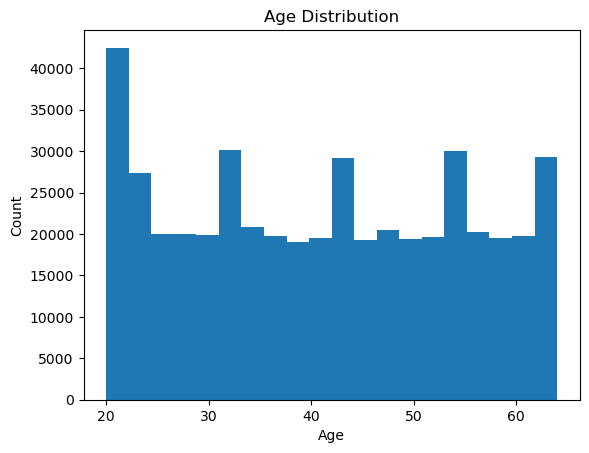

In [65]:
# Histogram of age distribution
plt.hist(me_df['Age'], bins=20)
plt.title('Age Distribution') 
plt.xlabel ('Age')
plt.ylabel ('Count') 
plt. show()

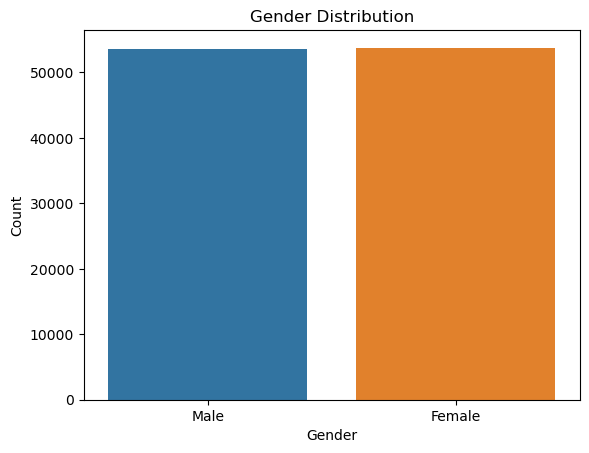

In [66]:
sns.countplot (x='Gender', data=new_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel ('Count')
plt.show()

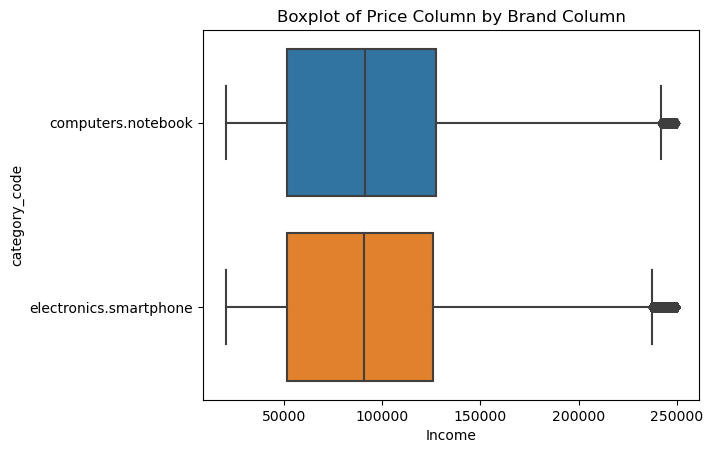

In [67]:
sns.boxplot(x='Income', y='category_code', data=me_df)  # Boxplot
plt.title('Boxplot of Price Column by Brand Column')
plt.show()

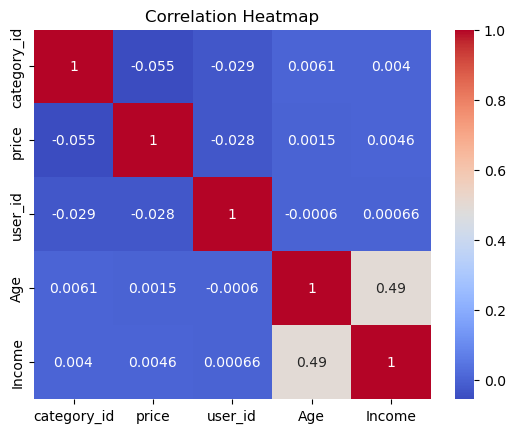

In [68]:
correlation_matrix = me_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

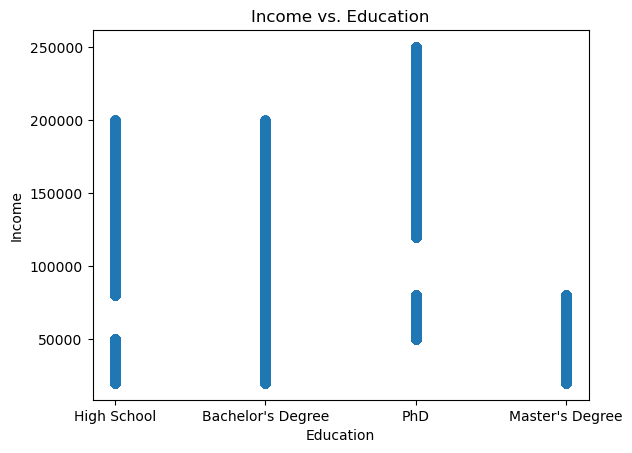

In [69]:
plt.show()
# Scatter plot of income and age
plt.scatter (me_df['Education'],me_df['Income']) 
plt.title('Income vs. Education')
plt.xlabel ('Education')
plt.ylabel ('Income') 
plt.show()

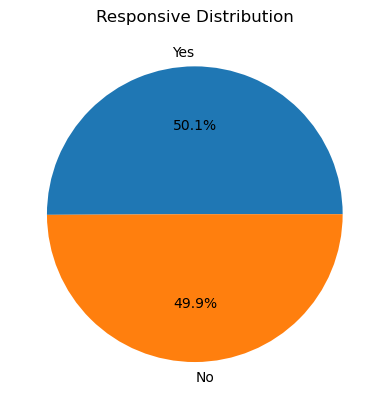

In [73]:
me_df['Campaign Response'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Responsive Distribution')
plt.ylabel('')
plt.show()

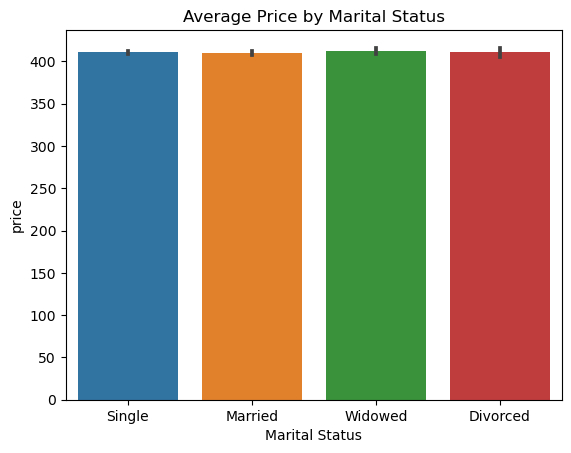

In [75]:
sns.barplot(data=me_df, x='Marital Status', y='price')
plt.title('Average Price by Marital Status')
plt.show()

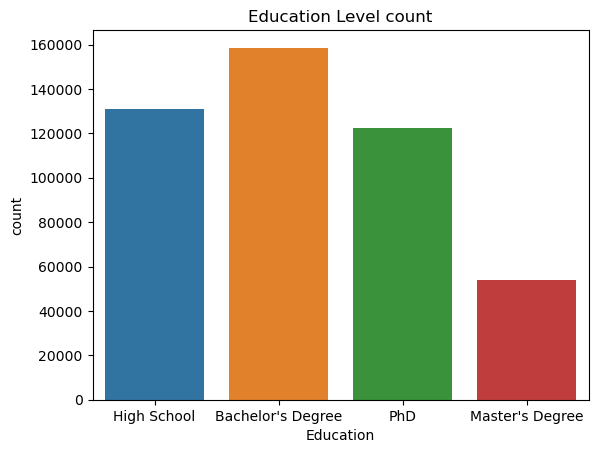

In [77]:
sns.countplot(data=me_df, x='Education')
plt.title('Education Level count')
plt.show()

In [127]:
# Top 10 popular categories in new user 
user_id['category_code'].value_counts().nlargest(10).plot( 
    kind='bar', 
    xlabel='Categories', 
    ylabel='Quantity', 
    label='Top 10 Popular Categories in New User', subplots=True)

NameError: name 'user_id' is not defined

In [83]:
me_df.groupby('Campaign Response').count()

,category_id,category_code,brand,price,user_id,user_session,Age,Gender,Income,Education,Marital Status
Campaign Response,,,,,,,,,,,
No,232497,232497,232497,232497,232497,232497,232497,232497,232497,232497,232497
Yes,233144,233144,233144,233144,233144,233144,233144,233144,233144,233144,233144


In [86]:
pip install pydataset

     -------------------------------------- 15.9/15.9 MB 446.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=8093d3003ba19bca09c3c513718f57848b0c0b04df749be15d67d9e22884102a
  Stored in directory: c:\users\bida21-052\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset
Note: you may need to restart the kernel to use updated packages.


In [88]:
!pip install scikit-learn

In [89]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=c58789acabe3ae6cb7ca12296e48837dbf894000e088d5d2297ece4892319f2f
  Stored in directory: c:\users\bida21-052\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [107]:
import pandas as pd
from pydataset import data
from sklearn import metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


In [108]:
import os

# Set the GraphViz executable path
graphviz_path = r'C:\Users\bida21-052\Downloads\windows_10_msbuild_Release_graphviz-8.0.5-win32'  # Replace with the actual GraphViz executable path

# Add the GraphViz path to the system's PATH environment variable
os.environ["PATH"] += os.pathsep + graphviz_path

In [109]:
X=me_df[['Gender']]
me_df['Campaign Response']=me_df['Campaign Response'].replace(1,'Yes')
me_df['Campaign Response']=me_df['Campaign Response'].replace(2,'No')
y=me_df['Campaign Response']

In [110]:
X_encoded = pd.get_dummies(X, columns=['Gender'])
clf = tree.DecisionTreeClassifier(min_samples_split=2000)
clf = clf.fit(X_encoded, y)

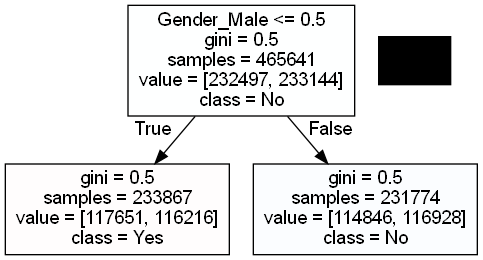

In [111]:
cn=['Yes', 'No']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True,feature_names=list(X_encoded.columns.values),class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [112]:
me_df.describe()

,category_id,price,user_id,Age,Income
count,4.656410e+05,465641.000000,4.656410e+05,465641.000000,465641.000000
mean,2.054459e+18,410.934575,5.321455e+08,41.069279,96900.107211
std,9.515907e+15,420.269978,1.679290e+07,13.347811,53675.723299
min,2.053010e+18,0.000000,2.449511e+08,20.000000,20002.000000
25%,2.053010e+18,130.700000,5.159166e+08,29.000000,51145.000000
50%,2.053010e+18,254.110000,5.293926e+08,41.000000,90553.000000
75%,2.053010e+18,587.560000,5.493729e+08,53.000000,125842.000000
max,2.175420e+18,2574.040000,5.557277e+08,64.000000,249980.000000


In [122]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
numeric_columns = ['price', 'Income']  # Specify your numeric columns

for column in numeric_columns:
    q1 = me_df[column].quantile(0.25)  # 1st quartile
    q3 = me_df[column].quantile(0.75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Detect outliers
    outliers = me_df[(me_df[column] < lower_bound) | (me_df[column] > upper_bound)]

    # Print the outliers
    print("Outliers in column", column)
    print(outliers)
    print()


Outliers in column price
         category_id           category_code  brand    price    user_id  \
2       2.053010e+18      computers.notebook     hp  1512.78  550050854   
8       2.053010e+18  electronics.smartphone  apple  1747.79  535871217   
9       2.053010e+18  electronics.smartphone  apple  1747.79  535871217   
22      2.053010e+18  electronics.smartphone  apple  1415.48  555446831   
24      2.053010e+18  electronics.smartphone  apple  1413.16  555446831   
...              ...                     ...    ...      ...        ...   
465601  2.053010e+18  electronics.smartphone  apple  1541.61  515777586   
465615  2.053010e+18  electronics.smartphone  apple  1747.79  554266927   
465617  2.053010e+18  electronics.smartphone  apple  1747.79  551865704   
465624  2.053010e+18      computers.notebook  apple  1352.67  553947741   
465639  2.053010e+18  electronics.smartphone  apple  1415.48  537482499   

                                user_session  Age  Gender  Income  \
2    

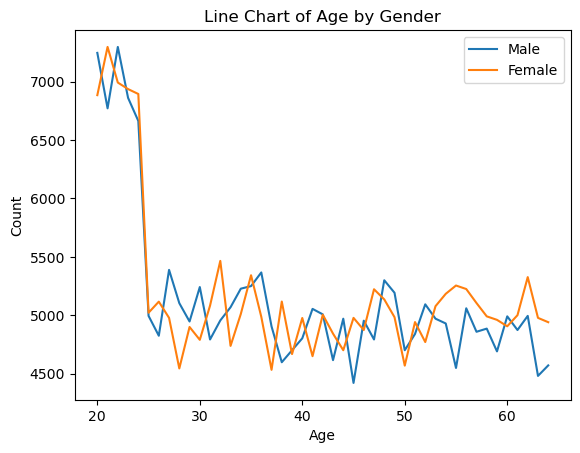

In [128]:
import matplotlib.pyplot as plt

# Filter the data by gender
male_data = me_df[me_df['Gender'] == 'Male']
female_data = me_df[me_df['Gender'] == 'Female']

# Group the filtered data by age and count the number of occurrences
male_counts = male_data.groupby('Age').size()
female_counts = female_data.groupby('Age').size()

# Create two line plots, one for males and one for females
plt.plot(male_counts.index, male_counts.values, label='Male')
plt.plot(female_counts.index, female_counts.values, label='Female')

# Add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Line Chart of Age by Gender')

# Add a legend
plt.legend()

# Show the plot
plt.show()